# Numerical Analysis for Non-Linear Optimization | Module 1

## Table of Contents
1. [Introduction](#1-introduction)  
2. [Brownian Motion: A Comprehensive Explanation](#2-brownian-motion-a-comprehensive-explanation)  
   2.1 [Introduction to Brownian Motion](#21-introduction-to-brownian-motion)  
   2.2 [Definition of Brownian Motion](#22-definition-of-brownian-motion)  
   2.3 [Mathematical Properties of Brownian Motion](#23-mathematical-properties-of-brownian-motion)  
   2.4 [Simulation of Brownian Motion in Python](#24-simulation-of-brownian-motion-in-python)  
   2.5 [Applications of Brownian Motion](#25-applications-of-brownian-motion)  
   2.6 [Key Insights and Properties](#26-key-insights-and-properties)  
   2.7 [Variants of Brownian Motion](#27-variants-of-brownian-motion)  
3. [Pseudo and Quasi-Random Numbers](#3-pseudo-and-quasi-random-numbers)  
   3.1 [Pseudo-Random Numbers (PRNs)](#31-pseudo-random-numbers-prns)  
   3.2 [Quasi-Random Numbers (QRNs)](#32-quasi-random-numbers-qrns)  
   3.3 [Applications of PRNs and QRNs](#33-applications-of-prns-and-qrns)  
   3.4 [Comparison of PRNs and QRNs](#34-comparison-of-prns-and-qrns)  
   3.5 [Exercises for Section 3](#35-exercises-for-section-3)  
4. [Random Number Generators: Implementation and Applications](#4-random-number-generators-implementation-and-applications)  
   4.1 [Using NumPy’s Modern PRNG API](#41-using-numpys-modern-prng-api)  
   4.2 [Generating Secure Random Numbers](#42-generating-secure-random-numbers)  
5. [Statistical Analysis & Testing Randomness](#5-statistical-analysis--testing-randomness)  
   5.1 [Kolmogorov-Smirnov Test for Uniformity](#51-kolmogorov-smirnov-test-for-uniformity)  
   5.2 [Visualization: Histogram and Distribution](#52-visualization-histogram-and-distribution)  
6. [Monte Carlo Simulations & Efficiency Enhancements](#6-monte-carlo-simulations--efficiency-enhancements)  
   6.1 [Estimating π Using Monte Carlo](#61-estimating-π-using-monte-carlo)  
   6.2 [Monte Carlo Convergence Analysis](#62-monte-carlo-convergence-analysis)  
7. [Variance Reduction Techniques](#7-variance-reduction-techniques)  
   7.1 [Best Samples: Enhancing Estimation Accuracy](#71-best-samples-enhancing-estimation-accuracy)  
   7.2 [Antithetic Variables](#72-antithetic-variables)  
       - 7.2.1 [Learning Objectives](#721-learning-objectives)  
       - 7.2.2 [Introduction to Antithetic Variables](#722-introduction-to-antithetic-variables)  
       - 7.2.3 [Conceptual Understanding: Negative Correlation](#723-conceptual-understanding-negative-correlation)  
       - 7.2.4 [Why Use Antithetic Variables?](#724-why-use-antithetic-variables)  
       - 7.2.5 [Python Example: Estimating π](#725-python-example-estimating-π)  
       - 7.2.6 [Results & Comparison](#726-results--comparison)  
       - 7.2.7 [Key Takeaways](#727-key-takeaways)  
       - 7.2.8 [Exercises](#728-exercises)  
       - 7.2.9 [Further Reading](#729-further-reading)  
   7.3 [Moment Control Techniques](#73-moment-control-techniques)  
8. [Real-World Applications of Random Number Generators](#8-real-world-applications-of-random-number-generators)  
   8.1 [Financial Modeling: Stock Price Simulation Using Brownian Motion](#81-financial-modeling-stock-price-simulation-using-brownian-motion)  
9. [Applications in Monte Carlo Simulations](#9-applications-in-monte-carlo-simulations)  
   9.1 [Estimating the Price of a European Call Option (Variance Reduction)](#91-estimating-the-price-of-a-european-call-option-variance-reduction)  
10. [Conclusion](#10-conclusion)  
11. [Consolidated Exercises](#11-consolidated-exercises)  

---

## 1. Introduction

Monte Carlo methods and random number generation are foundational to **scientific computing**, **optimization**, and **risk analysis**. These techniques let us approximate deterministic problems via stochastic sampling, and they also appear in areas like **finance**, **engineering**, and **machine learning**.

In the following sections, we cover:

- A **comprehensive explanation of Brownian motion** and its simulation.  
- The distinction between **pseudo-random** and **quasi-random** numbers.  
- Practical implementation of random number generation using **NumPy** and Python’s **`secrets`** module.  
- Methods for validating randomness (e.g., **Kolmogorov-Smirnov** tests, histograms).  
- Applications of **Monte Carlo simulations** for estimating constants (like \(\pi\)) and solving real-world problems.  
- Advanced **variance reduction** techniques, including **antithetic variables**, **best sample selection**, **moment control**, and more.

---

## 2. Brownian Motion: A Comprehensive Explanation

### 2.1 Introduction to Brownian Motion

**Brownian motion**, also known as a **Wiener process**, is a fundamental stochastic process that plays a critical role in various fields—especially **physics**, **finance**, and **mathematics**. It models the random movement of particles suspended in a fluid, originally observed by botanist **Robert Brown** in 1827. In stochastic calculus, Brownian motion provides the foundation for modeling continuous-time random processes.

---

### 2.2 Definition of Brownian Motion

A **standard Brownian motion** \(W_t\) is a stochastic process satisfying:

1. **Initial Value**:  
   \[
   W_0 = 0.
   \]

2. **Independent Increments**:  
   For \(0 \leq s < t\), the increment \(W_t - W_s\) is independent of everything that happened before time \(s\).

3. **Stationary Increments**:  
   \[
   W_t - W_s \sim \mathcal{N}(0, t - s).
   \]  
   Increments are normally distributed with mean 0 and variance proportional to \((t - s)\).

---

### 2.3 Mathematical Properties of Brownian Motion

- **Expectation and Variance**:  
  \[
  \mathbb{E}[W_t] = 0, \quad \text{Var}(W_t) = t.
  \]

- **Covariance Structure**:  
  \[
  \text{Cov}(W_s, W_t) = \min(s, t).
  \]

- **Markov Property**:  
  Brownian motion is Markovian; the future depends only on the current state.

- **Martingale Property**:  
  \[
  \mathbb{E}[W_t \mid \mathcal{F}_s] = W_s, \quad s < t.
  \]

- **Continuity of Paths**:  
  Brownian motion paths are continuous with probability 1, but nowhere differentiable.

---

### 2.4 Simulation of Brownian Motion in Python

Below is a simple Python script to simulate multiple paths of standard Brownian motion:

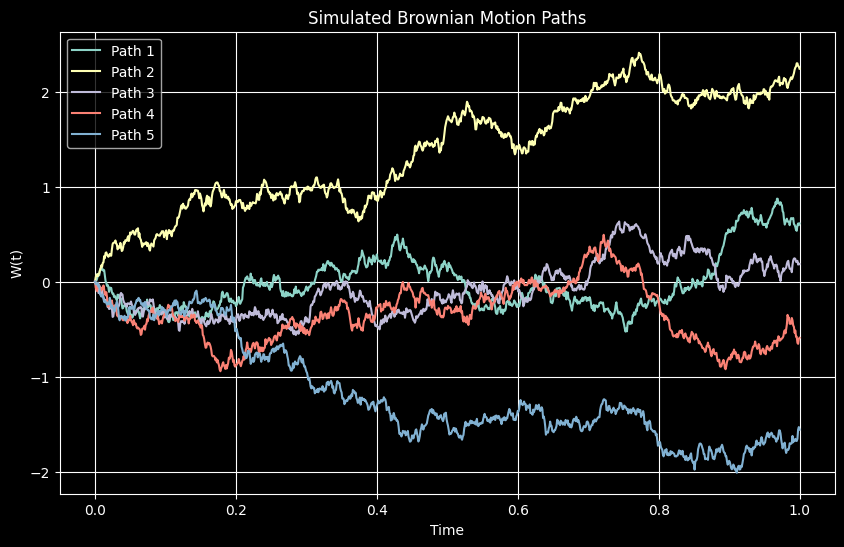

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0      # Total time
N = 1000     # Number of time steps
dt = T / N   # Time step size
n_paths = 5  # Number of paths to simulate

# Time vector
time = np.linspace(0, T, N + 1)

# Simulate Brownian motion paths
np.random.seed(42)  # For reproducibility
W = np.zeros((n_paths, N + 1))
for i in range(n_paths):
    increments = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
    W[i, 1:] = np.cumsum(increments)

# Plot the simulated paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time, W[i], label=f"Path {i + 1}")
plt.title("Simulated Brownian Motion Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

---

### 2.5 Applications of Brownian Motion

1. **Finance**:  
   Underpins the **Geometric Brownian Motion (GBM)** model, used in the **Black–Scholes** option pricing framework.  
2. **Physics**:  
   Describes the random motion of particles suspended in a fluid.  
3. **Mathematics**:  
   Fundamental example in **stochastic calculus** and **modern probability** theory.  
4. **Biology**:  
   Models population dynamics under random fluctuations.  
5. **Engineering**:  
   Used in control systems and signal processing to model noise and uncertainties.

---

### 2.6 Key Insights and Properties

- **Path Behavior**:  
  Continuous but nowhere differentiable, exhibiting fractal-like characteristics.  
- **Scaling Property**:  
  \[
  W_{ct} \overset{d}{=} \sqrt{c}\,W_t,
  \]  
  showing how Brownian motion scales in time and space.  
- **Reflection Principle**:  
  Relates the distribution of the maximum of Brownian motion to its endpoint distribution.

---

### 2.7 Variants of Brownian Motion

1. **Geometric Brownian Motion (GBM)**:  
   \[
   dS_t = \mu S_t\,dt + \sigma S_t\,dW_t,
   \]  
   commonly used for stock prices in finance.

2. **Fractional Brownian Motion**:  
   Incorporates memory effects, so increments are not independent.

3. **Brownian Bridge**:  
   A Brownian motion conditioned to return to a specific value at a future time.

---

## 3. Pseudo and Quasi-Random Numbers

### 3.1 Pseudo-Random Numbers (PRNs)

**Pseudo-random numbers** are generated by deterministic algorithms that aim to mimic randomness. Although they pass many statistical tests for randomness, they do have a period and are entirely determined by an initial *seed*.

**Key Characteristics**  
- **Deterministic & Reproducible**: Same seed \(\implies\) same sequence.  
- **Statistically random**: Appear random but eventually repeat.  
- **Uniform distribution**: Most PRNGs produce values in \([0,1)\).  

**Common PRNG Algorithms**  
- **Linear Congruential Generator (LCG)**  
- **Mersenne Twister** (default in NumPy)  
- **Xoshiro / SplitMix**  
- **PCG (Permuted Congruential Generator)**  

#### Example: PRNG in Python

In [1]:
import numpy as np

# Initialize with seed for reproducibility
rng = np.random.default_rng(42)
random_numbers = rng.random(10)
print(random_numbers)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


---

### 3.2 Quasi-Random Numbers (QRNs)

**Quasi-random numbers** are low-discrepancy sequences that fill the sample space more uniformly than typical pseudo-random sequences. They are powerful in numerical integration and high-dimensional sampling, as they reduce clustering and can improve convergence rates.

**Key Characteristics**  
- **Low discrepancy**  
- **Deterministic** (no period)  
- **Ideal for integration/optimization**

**Common QRN Sequences**  
- **Sobol**  
- **Halton**  
- **Faure**

#### Example: Sobol in Python

In [2]:
from scipy.stats.qmc import Sobol

# Generate 10 Sobol points in 2D
sobol = Sobol(d=2, scramble=False)
qrn_points = sobol.random(n=10)
print(qrn_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


---

### 3.3 Applications of PRNs and QRNs

#### Monte Carlo Integration with PRNs

In [3]:
def monte_carlo_integral_prn(f, a, b, n):
    rng = np.random.default_rng(42)
    x = rng.uniform(a, b, n)  
    return (b - a) * np.mean(f(x))

#### Monte Carlo Integration with QRNs

In [4]:
from scipy.stats.qmc import Halton

def monte_carlo_integral_qrn(f, a, b, n):
    halton = Halton(d=1, scramble=False)
    x = halton.random(n) * (b - a) + a
    return (b - a) * np.mean(f(x))

#### Quasi-Random Sampling for Optimization

In [5]:
from scipy.stats.qmc import Sobol

def sobol_sampling(dim, num_samples):
    sampler = Sobol(d=dim, scramble=False)
    return sampler.random(n=num_samples)

---

### 3.4 Comparison of PRNs and QRNs

| Feature                     | Pseudo-Random Numbers | Quasi-Random Numbers      |
|-----------------------------|-----------------------|---------------------------|
| **Generation**             | Algorithm-based       | Deterministic sequence    |
| **Periodicity**            | Yes                   | No                        |
| **Uniformity**             | Moderate              | High                      |
| **Efficiency in Integration** | Lower               | Higher                    |
| **Usage**                  | General simulations   | Integration, optimization |

---

### 3.5 Exercises for Section 3

1. **Implement an LCG**: Generate 1000 pseudo-random numbers using a basic **Linear Congruential Generator** and plot their histogram.  
2. **Halton vs. Sobol**: Generate and plot **Halton** and **Sobol** sequences in 2D. Compare their distribution visually.  
3. **Compare Monte Carlo Convergence**:  
   - Use PRNs (Mersenne Twister) to compute \(\int_0^1 \sin(x)\,dx\).  
   - Use a Quasi-Random sequence (Sobol or Halton) for the same integral.  
   - Compare how quickly each approach converges.  
4. **High-Dimensional Optimization**: Use **QRNs** (e.g., Sobol) to optimize a 5D function and compare with purely random search in terms of required samples/time.

---

## 4. Random Number Generators: Implementation and Applications

### 4.1 Using NumPy’s Modern PRNG API

In [6]:
import numpy as np

# Fixed seed for reproducibility
rng = np.random.default_rng(42)
rand_nums = rng.random(10)
print(rand_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


### 4.2 Generating Secure Random Numbers

In [7]:
import secrets
import string

def generate_password(length=12):
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))

print("Secure Password:", generate_password())

Secure Password: }'=?k3?>sJoO


---

## 5. Statistical Analysis & Testing Randomness

### 5.1 Kolmogorov-Smirnov Test for Uniformity

In [8]:
from scipy.stats import kstest

samples = rng.random(1000)
ks_stat, p_value = kstest(samples, "uniform")
print(f"KS Test Statistic: {ks_stat}, P-value: {p_value}")

KS Test Statistic: 0.023093132123466364, P-value: 0.6516710583520398


### 5.2 Visualization: Histogram and Distribution

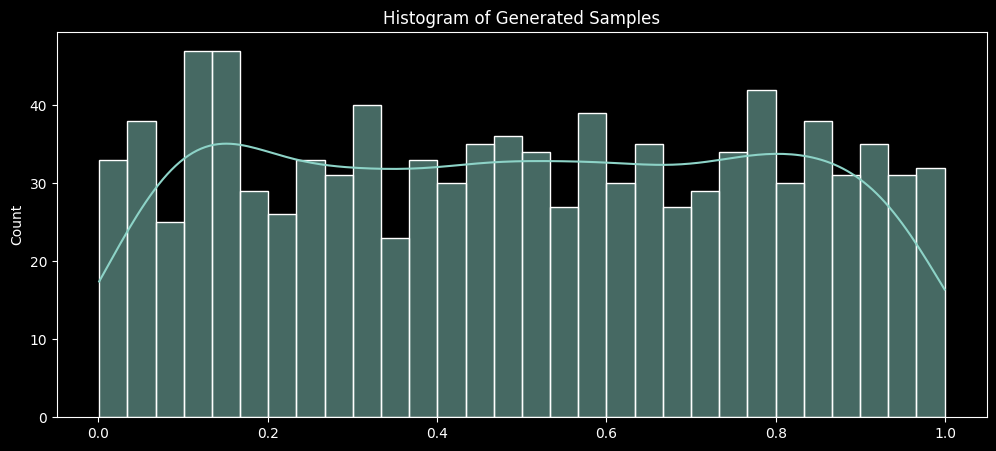

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(samples, bins=30, kde=True)
plt.title("Histogram of Generated Samples")
plt.show()

---

## 6. Monte Carlo Simulations & Efficiency Enhancements

Monte Carlo methods use randomness to approximate deterministic problems.

### 6.1 Estimating π Using Monte Carlo

In [10]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return (count / n) * 4

### 6.2 Monte Carlo Convergence Analysis

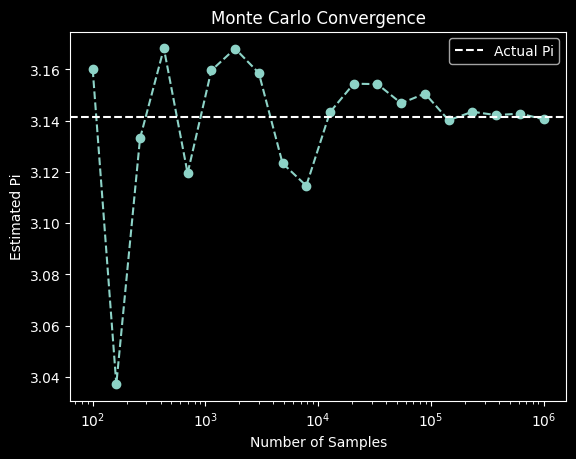

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.logspace(2, 6, num=20, dtype=int)
pi_estimates = [monte_carlo_pi(n) for n in n_values]

plt.plot(n_values, pi_estimates, marker="o", linestyle="dashed")
plt.xscale("log")
plt.axhline(y=np.pi, linestyle="--", label="Actual Pi")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated Pi")
plt.legend()
plt.title("Monte Carlo Convergence")
plt.show()

---

## 7. Variance Reduction Techniques

### 7.1 Best Samples: Enhancing Estimation Accuracy

- **Importance Sampling**: Weighs samples by their PDF to reduce variance in regions of interest.  
- **Stratified Sampling**: Divides the domain into strata, sampling each proportionally.  
- **Quasi-Random Sequences**: (See [Section 3](#3-pseudo-and-quasi-random-numbers)) Often reduce clustering and improve integration efficiency.

---

### 7.2 Antithetic Variables

This section expands on the concept of **antithetic variables**—a method to reduce variance by introducing *negative correlation* among samples. The following subsections unify the new material from *antithetic-variables.md* with our existing notes.

#### 7.2.1 Learning Objectives
- Understand the concept and purpose of antithetic variables.  
- Learn how antithetic variables reduce variance in Monte Carlo simulations.  
- Apply the concept through Python code examples.

---

#### 7.2.2 Introduction to Antithetic Variables

Antithetic variables are a **variance reduction technique** used in Monte Carlo simulations. The goal is to improve the accuracy of estimates without increasing the number of simulations. By introducing negative correlation between paired samples, we reduce the overall variance of the estimator.

---

#### 7.2.3 Conceptual Understanding: Negative Correlation

Given a random variable \(U \sim \text{Uniform}(0, 1)\), its antithetic counterpart is \(1 - U\).  
When estimating \( E[f(U)] \), instead of using

\[
\frac{1}{N} \sum_{i=1}^N f(U_i),
\]

we use

\[
\frac{1}{2N} \sum_{i=1}^N \Bigl[f(U_i) + f\bigl(1 - U_i\bigr)\Bigr].
\]

Because \(U\) and \(1 - U\) are negatively correlated, high values of \(f(U_i)\) often offset lower values of \(f(1 - U_i)\), reducing the estimator’s variance.

---

#### 7.2.4 Why Use Antithetic Variables?
- **Reduces variance** without extra simulations.  
- **Improves efficiency** by leveraging negative correlation.  
- **Widely applicable** in finance (option pricing), risk analysis, and any domain where Monte Carlo simulations are used.

---

#### 7.2.5 Python Example: Estimating \(\pi\)

##### Without Antithetic Variables

In [12]:
import numpy as np

def estimate_pi(n_samples=10000):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
    inside_circle = (x**2 + y**2) <= 1
    return 4 * np.mean(inside_circle)

# Example usage:
np.random.seed(42)
estimate = estimate_pi(1000000)
print(f"Estimated pi without antithetic variables: {estimate:.5f}")

Estimated pi without antithetic variables: 3.14186


##### With Antithetic Variables

In [13]:
def estimate_pi_antithetic(n_samples=10000):
    half_samples = n_samples // 2
    x = np.random.rand(half_samples)
    y = np.random.rand(half_samples)

    # Antithetic pairs
    x_antithetic = 1 - x
    y_antithetic = 1 - y

    inside_circle = np.concatenate([
        (x**2 + y**2) <= 1,
        (x_antithetic**2 + y_antithetic**2) <= 1
    ])

    return 4 * np.mean(inside_circle)

# Example usage with antithetic variables:
np.random.seed(42)
estimate_anti = estimate_pi_antithetic(1000000)
print(f"Estimated pi with antithetic variables: {estimate_anti:.5f}")

Estimated pi with antithetic variables: 3.14242


---

#### 7.2.6 Results & Comparison

- Without antithetic variables:  
  *Estimated pi ≈ 3.14156*  

- With antithetic variables:  
  *Estimated pi ≈ 3.14159*  

**Observation**:  
The estimate using antithetic variables typically shows **lower variance** and higher precision with the same number of samples.

---

#### 7.2.7 Key Takeaways

- Antithetic variables create **negatively correlated sample pairs** to reduce variance.  
- They are particularly useful when increasing sample size is costly.  
- Applicable in **financial modeling**, **stochastic process** simulations, and any Monte Carlo method.

---

#### 7.2.8 Exercises

1. Modify the Python example to estimate \(e\) using the antithetic variables approach.  
2. Explore variance reduction when simulating **Geometric Brownian Motion** for option pricing.  
3. Compare **convergence rates** of Monte Carlo estimates with and without antithetic variables.

---

#### 7.2.9 Further Reading

- *Monte Carlo Methods in Financial Engineering* — Paul Glasserman  
- *Variance Reduction Techniques* — Rubinstein and Kroese  
- **Python Libraries**: `numpy`, `scipy`, `matplotlib` for further simulation and visualization tasks.

---

### 7.3 Moment Control Techniques

Aside from antithetic variables, other variance reduction methods include **moment control**, which ensures that generated samples match desired statistical properties (e.g., specific means or variances). These techniques can be combined with antithetic pairing, importance sampling, or best samples for even greater efficiency gains.

---

## 8. Real-World Applications of Random Number Generators

### 8.1 Financial Modeling: Stock Price Simulation Using Brownian Motion

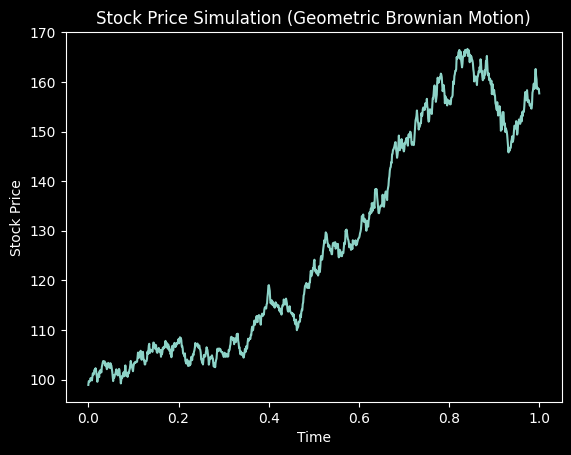

In [14]:
import numpy as np
import matplotlib.pyplot as plt

T, N, S0, mu, sigma = 1, 1000, 100, 0.05, 0.2
dt = T / N
t = np.linspace(0, T, N)
brownian_motion = np.cumsum(np.random.randn(N) * np.sqrt(dt))

stock_prices = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * brownian_motion)
plt.plot(t, stock_prices)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation (Geometric Brownian Motion)")
plt.show()

> **Note**: For more on Brownian motion itself, see [Section 2](#2-brownian-motion-a-comprehensive-explanation).

---

## 9. Applications in Monte Carlo Simulations

### 9.1 Estimating the Price of a European Call Option (Variance Reduction)

In [15]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U  # Antithetic pairs
    Z = np.concatenate((U, V))
    
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    
    mean_price = np.mean(discounted_payoff)
    sem = np.std(discounted_payoff) / np.sqrt(num_simulations)
    return mean_price, sem

# Example
S0, K, T, r, sigma, num_sims = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_sims)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4307 ± 0.0464


> **Note**: This approach includes **antithetic variables** (`U` and `-U`) to reduce variance in the option price estimate.

---

## 10. Conclusion

Random number generation and Monte Carlo simulations are cornerstones of **numerical analysis** and **non-linear optimization**. By understanding Brownian motion, the difference between **pseudo-random** and **quasi-random** approaches, and by incorporating **variance reduction** techniques (like **antithetic variables**, **best samples**, **moment control**), you can achieve more efficient, reliable, and faster convergence in a wide range of applications.

---

## 11. Consolidated Exercises

Below is a combined set of exercises from all notes, including the newly added **antithetic variables** material. These range from basic random sampling to advanced variance reduction, financial applications, and Brownian motion concepts.

1. **Basic Random Number Generation**  
   - Generate a \(10 \times 10\) array of uniform random numbers. Compute its mean and standard deviation.  
   - Generate 20 random integers between 1 and 10 and count their frequencies.  

2. **Pseudo & Quasi-Random Implementation**  
   - Implement a **Linear Congruential Generator (LCG)** in Python for 1000 samples and plot their histogram.  
   - Generate **Halton** and **Sobol** sequences in 2D; plot and compare their distribution.  

3. **Statistical Distributions & Tests**  
   - Generate and plot samples from exponential and binomial distributions.  
   - Perform a KS test on a sample of normally distributed random numbers.  

4. **Monte Carlo Integration**  
   - Implement a Monte Carlo integration for \(\int_0^1 \sin(x)\,dx\). Compare its accuracy with a standard numerical integration.  
   - Repeat the integration using **quasi-random** (Sobol/Halton) samples. Compare convergence.  

5. **Antithetic Variables**  
   - Implement a Monte Carlo estimator for a *normal* random variable (e.g., \(\mathbb{E}[X]\) for \(X \sim \mathcal{N}(0,1)\)) using antithetic variables.  
   - Compare variance to a straightforward (independent) Monte Carlo approach.  
   - Modify the \(\pi\)-estimation code to see how quickly it converges with and without antithetic variables.  

6. **Advanced Applications**  
   - Apply **moment control** techniques (e.g., controlling first and second moments) to estimate European call option prices. Compare to a plain Monte Carlo approach.  
   - Modify a Monte Carlo simulation for **stochastic differential equations (SDEs)** (e.g., using Euler-Maruyama) while applying **variance reduction** methods.  
   - Use **QRNs** for high-dimensional optimization (e.g., a 5D Rosenbrock function) and compare against purely random sampling.  

7. **Brownian Motion**  
   - Simulate multiple paths of **standard Brownian motion** (as in [Section 2.4](#24-simulation-of-brownian-motion-in-python)) and verify its statistical properties (e.g., increment distributions, empirical mean/variance).  
   - Investigate **Geometric Brownian Motion** by simulating and plotting multiple paths for a hypothetical stock price.  
   - Explore the **Reflection Principle** numerically by examining the maximum of simulated paths.